## What is Pandas?
Pandas is an expansive data-analysis and manipulation package for Python, built on numpy and matplotlib. It can be installed several ways, depending on your operating system.

It can be installed directly with PyPi and functions with both Python2 and Python3:	```pip install pandas```

However, perhaps the easiest way is to install Anaconda, which includes dozens of packages for data science, data analysis, and the like: https://www.anaconda.com/

Anaconda includes the Jupyter Notebook, which is a web interface into IPython, or Interactive Python, and is more or less a mixture between a graphical Python interpreter and an IDE, allowing correction of errors, display of charts and graphics, and a mix of code and Markdown text. There are dozens of good tutorials on IPython/Jupyter available for free online. It allows saving all your work in "notebooks," which are files with an ```.ipynb``` extension for sharing with others or running later. Your work can also be exported in normal Python files, HTML, Markdown, etc.

Anaconda is available for Windows, Linux, and macOS. It installs all required dependencies in what is similar to a virtual Python environment, installed in its own folder structure. 


## Advantages of using Jupyter or IPython Notebooks
As mentioned, code can be run live in Jupyter, but unlike a normal interpreter, corrections can be made, state can be saved, multiple sessions/notebooks can be opened, comments and graphics can be added in order to make a very clean experience. No messy errors cluttering up the screen. The kernel can be halted and re-run as well if you wish.

All examples will be done in the Jupyter Notebook in this tutorial.


## Why Pandas?
Besides the numerous functions and methods Pandas has for manipulating and analyzing data, it also contains methods to read and write Excel files, CSV/TSV, XML, JSON, SQL/SQLite into and out of a Pandas "DataFrame." The DataFrame is somewhere between a 2D array and a live spreadsheet, able to be indexed, searched, filtered, and otherwise played with however you want.

Each DataFrame, like a table in a database, will have columns and entries. A DataFrame may have an index, similar to the primary key in an SQLite DB. The index may be whatever you want, such as a timestamp or a MAC Address, depending how you want to look at the data.

Data can be filtered, sorted, indexed, and whatnot on any of the columns. DataFrames can be deduplicated based on any one or all of the columns. They can be ordered and grouped by one or more of the column entries, depending on your goals.

I will cover some of the simple but useful ways Kismet database data can be manipulated in Pandas.


## Getting Started in the Jupyter Notebook
I will assume you already know how to run the Jupyter Notebook and these examples won't explain much background but should demonstrate some easy ways to use Kismet data.

Note: notebooks contain "cells" which can be run by hitting ```Shift-Enter``` or the Run button in the menu bar. This allows single lines or code blocks to be run at once.

In [1]:
#these are some necessary imports for what we're going to do
#pandas is typically imported as 'pd' because... you know... save typing 4 letters
import pandas as pd
import sqlite3
import json

#these are some other libraries that are typically used, but we won't here
#import numpy as np
#import matplotlib.pyplot as plt


In [2]:
#define a sql query, which is just text, then open connection to db
#we could also just pull the entries we want, but I'll do * for now
sql = 'SELECT * FROM devices;'
conn = sqlite3.connect('guate.kismet')

#read data from sqlite db into pandas dataframe, called 'guate'
guate = pd.read_sql_query(sql, conn)

#close database
conn.close()

In [3]:
#the .head() method by default shows the first five rows, as you would expect
#there is also .tail()
guate.head()

,first_time,last_time,devkey,phyname,devmac,strongest_signal,min_lat,min_lon,max_lat,max_lon,avg_lat,avg_lon,bytes_data,type,device
0,1584967309,1584967309,4202770D00000000_8AC31B19A1DA0000,IEEE802.11,DA:A1:19:1B:C3:8A,-87,0.0,0.0,0.0,0.0,0.0,0.0,0,Wi-Fi Device,"b'{""kismet.device.base.manuf"": ""Unknown"",""kism..."
1,1584967361,1584967361,4202770D00000000_10A877DF80380000,IEEE802.11,38:80:DF:77:A8:10,-81,0.0,0.0,0.0,0.0,0.0,0.0,0,Wi-Fi Client,"b'{""kismet.device.base.manuf"": ""Motorola Mobil..."
2,1584967372,1584967372,4202770D00000000_668AB238E8DC0000,IEEE802.11,DC:E8:38:B2:8A:66,-85,0.0,0.0,0.0,0.0,0.0,0.0,0,Wi-Fi Client,"b'{""kismet.device.base.manuf"": ""CK Telecom (Sh..."
3,1584967381,1584967381,4202770D00000000_3D42DE1504EA0000,IEEE802.11,EA:04:15:DE:42:3D,-87,0.0,0.0,0.0,0.0,0.0,0.0,0,Wi-Fi Client,"b'{""kismet.device.base.manuf"": ""Unknown"",""kism..."
4,1584967391,1584967391,4202770D00000000_E3B1AA7471A40000,IEEE802.11,A4:71:74:AA:B1:E3,-88,0.0,0.0,0.0,0.0,0.0,0.0,0,Wi-Fi Device,"b'{""kismet.device.base.manuf"": ""Huawei Technol..."


In [4]:
#columns can be referenced (as a Pandas Series) like a Python dictionary
guate['first_time']

0       1584967309
1       1584967361
2       1584967372
3       1584967381
4       1584967391
           ...    
3182    1584967684
3183    1584967692
3184    1584968366
3185    1585027898
3186    1585128337
Name: first_time, Length: 3187, dtype: int64

In [5]:
#or, if they have no illegal characters (like spaces), as an attribute
guate.first_time

0       1584967309
1       1584967361
2       1584967372
3       1584967381
4       1584967391
           ...    
3182    1584967684
3183    1584967692
3184    1584968366
3185    1585027898
3186    1585128337
Name: first_time, Length: 3187, dtype: int64

In [6]:
#one of the most-useful methods on a dataframe is the value_counts method
#here it simply tells us all values of the 'type' column and how many of each
guate.type.value_counts()

Wi-Fi Client     1456
Wi-Fi Bridged     517
Wi-Fi Device      454
Wi-Fi AP          390
BTLE              344
Wi-Fi Ad-Hoc       12
BR/EDR              8
Wi-Fi WDS           6
Name: type, dtype: int64

In [7]:
#and... we can plot that as a bar plot or whatever
#note: figsize is a tuple defining width/height of plot
#for a bar plot, 15,5 is decent
guate.type.value_counts().plot.bar(figsize=(15,5))

In [8]:
guate.head()

,first_time,last_time,devkey,phyname,devmac,strongest_signal,min_lat,min_lon,max_lat,max_lon,avg_lat,avg_lon,bytes_data,type,device
0,1584967309,1584967309,4202770D00000000_8AC31B19A1DA0000,IEEE802.11,DA:A1:19:1B:C3:8A,-87,0.0,0.0,0.0,0.0,0.0,0.0,0,Wi-Fi Device,"b'{""kismet.device.base.manuf"": ""Unknown"",""kism..."
1,1584967361,1584967361,4202770D00000000_10A877DF80380000,IEEE802.11,38:80:DF:77:A8:10,-81,0.0,0.0,0.0,0.0,0.0,0.0,0,Wi-Fi Client,"b'{""kismet.device.base.manuf"": ""Motorola Mobil..."
2,1584967372,1584967372,4202770D00000000_668AB238E8DC0000,IEEE802.11,DC:E8:38:B2:8A:66,-85,0.0,0.0,0.0,0.0,0.0,0.0,0,Wi-Fi Client,"b'{""kismet.device.base.manuf"": ""CK Telecom (Sh..."
3,1584967381,1584967381,4202770D00000000_3D42DE1504EA0000,IEEE802.11,EA:04:15:DE:42:3D,-87,0.0,0.0,0.0,0.0,0.0,0.0,0,Wi-Fi Client,"b'{""kismet.device.base.manuf"": ""Unknown"",""kism..."
4,1584967391,1584967391,4202770D00000000_E3B1AA7471A40000,IEEE802.11,A4:71:74:AA:B1:E3,-88,0.0,0.0,0.0,0.0,0.0,0.0,0,Wi-Fi Device,"b'{""kismet.device.base.manuf"": ""Huawei Technol..."


In [9]:
#converting unix timestamps to datetime objects is dead simple
pd.to_datetime(1578757585, unit='s')

Timestamp('2020-01-11 15:46:25')

In [10]:
#and... we can use the same exact method to convert an entire series/column at once
#use the pandas to_datetime method to convert the first_time and last_time to actual datetime objects
guate.first_time = pd.to_datetime(guate.first_time, unit='s')
guate.last_time = pd.to_datetime(guate.last_time, unit='s')

In [11]:
#looking at the dataframe now, you'll see first_time and last_time are actual datetime objects
guate.head()

,first_time,last_time,devkey,phyname,devmac,strongest_signal,min_lat,min_lon,max_lat,max_lon,avg_lat,avg_lon,bytes_data,type,device
0,2020-03-23 12:41:49,2020-03-23 12:41:49,4202770D00000000_8AC31B19A1DA0000,IEEE802.11,DA:A1:19:1B:C3:8A,-87,0.0,0.0,0.0,0.0,0.0,0.0,0,Wi-Fi Device,"b'{""kismet.device.base.manuf"": ""Unknown"",""kism..."
1,2020-03-23 12:42:41,2020-03-23 12:42:41,4202770D00000000_10A877DF80380000,IEEE802.11,38:80:DF:77:A8:10,-81,0.0,0.0,0.0,0.0,0.0,0.0,0,Wi-Fi Client,"b'{""kismet.device.base.manuf"": ""Motorola Mobil..."
2,2020-03-23 12:42:52,2020-03-23 12:42:52,4202770D00000000_668AB238E8DC0000,IEEE802.11,DC:E8:38:B2:8A:66,-85,0.0,0.0,0.0,0.0,0.0,0.0,0,Wi-Fi Client,"b'{""kismet.device.base.manuf"": ""CK Telecom (Sh..."
3,2020-03-23 12:43:01,2020-03-23 12:43:01,4202770D00000000_3D42DE1504EA0000,IEEE802.11,EA:04:15:DE:42:3D,-87,0.0,0.0,0.0,0.0,0.0,0.0,0,Wi-Fi Client,"b'{""kismet.device.base.manuf"": ""Unknown"",""kism..."
4,2020-03-23 12:43:11,2020-03-23 12:43:11,4202770D00000000_E3B1AA7471A40000,IEEE802.11,A4:71:74:AA:B1:E3,-88,0.0,0.0,0.0,0.0,0.0,0.0,0,Wi-Fi Device,"b'{""kismet.device.base.manuf"": ""Huawei Technol..."


In [12]:
#we can drop any columns we don't need/want. In this case, no gps, so no purpose to these columns
#the axis=1 refers to the columns... the index is 0 and the columns are 1
#inplace=True modifies the existing dataframe in place without copying to another
#although you could leave out inplace and assign this to a different dataframe
guate.drop(['min_lat', 'min_lon', 'max_lat', 'max_lon', 'avg_lat', 'avg_lon'],
           axis=1,
          inplace=True)

In [13]:
guate.head()

,first_time,last_time,devkey,phyname,devmac,strongest_signal,bytes_data,type,device
0,2020-03-23 12:41:49,2020-03-23 12:41:49,4202770D00000000_8AC31B19A1DA0000,IEEE802.11,DA:A1:19:1B:C3:8A,-87,0,Wi-Fi Device,"b'{""kismet.device.base.manuf"": ""Unknown"",""kism..."
1,2020-03-23 12:42:41,2020-03-23 12:42:41,4202770D00000000_10A877DF80380000,IEEE802.11,38:80:DF:77:A8:10,-81,0,Wi-Fi Client,"b'{""kismet.device.base.manuf"": ""Motorola Mobil..."
2,2020-03-23 12:42:52,2020-03-23 12:42:52,4202770D00000000_668AB238E8DC0000,IEEE802.11,DC:E8:38:B2:8A:66,-85,0,Wi-Fi Client,"b'{""kismet.device.base.manuf"": ""CK Telecom (Sh..."
3,2020-03-23 12:43:01,2020-03-23 12:43:01,4202770D00000000_3D42DE1504EA0000,IEEE802.11,EA:04:15:DE:42:3D,-87,0,Wi-Fi Client,"b'{""kismet.device.base.manuf"": ""Unknown"",""kism..."
4,2020-03-23 12:43:11,2020-03-23 12:43:11,4202770D00000000_E3B1AA7471A40000,IEEE802.11,A4:71:74:AA:B1:E3,-88,0,Wi-Fi Device,"b'{""kismet.device.base.manuf"": ""Huawei Technol..."


In [14]:
#simple method to strip a mac down to its OUI
'2C:60:0C:AA:36:7A'.replace(':', '')[0:6]

'2C600C'

In [15]:
#and we can write a function to do the same thing to the entire devmac column
def get_oui(mac):
    oui = mac.replace(':', '')[0:6]
    return oui

In [16]:
#and create a new column called 'oui' out of the resulting values
#using the apply() method

#so... apply will do something to an entire column and assign the result to the same or different column
guate['oui'] = guate.devmac.apply(get_oui)

In [17]:
guate.head()

,first_time,last_time,devkey,phyname,devmac,strongest_signal,bytes_data,type,device,oui
0,2020-03-23 12:41:49,2020-03-23 12:41:49,4202770D00000000_8AC31B19A1DA0000,IEEE802.11,DA:A1:19:1B:C3:8A,-87,0,Wi-Fi Device,"b'{""kismet.device.base.manuf"": ""Unknown"",""kism...",DAA119
1,2020-03-23 12:42:41,2020-03-23 12:42:41,4202770D00000000_10A877DF80380000,IEEE802.11,38:80:DF:77:A8:10,-81,0,Wi-Fi Client,"b'{""kismet.device.base.manuf"": ""Motorola Mobil...",3880DF
2,2020-03-23 12:42:52,2020-03-23 12:42:52,4202770D00000000_668AB238E8DC0000,IEEE802.11,DC:E8:38:B2:8A:66,-85,0,Wi-Fi Client,"b'{""kismet.device.base.manuf"": ""CK Telecom (Sh...",DCE838
3,2020-03-23 12:43:01,2020-03-23 12:43:01,4202770D00000000_3D42DE1504EA0000,IEEE802.11,EA:04:15:DE:42:3D,-87,0,Wi-Fi Client,"b'{""kismet.device.base.manuf"": ""Unknown"",""kism...",EA0415
4,2020-03-23 12:43:11,2020-03-23 12:43:11,4202770D00000000_E3B1AA7471A40000,IEEE802.11,A4:71:74:AA:B1:E3,-88,0,Wi-Fi Device,"b'{""kismet.device.base.manuf"": ""Huawei Technol...",A47174


In [18]:
#then we can do some meaningful analysis of the OUIs
#in this case, the DAA119 is the winner. No surprise there.
guate.oui.value_counts()

DAA119    415
F09FC2    263
E2CB9C    148
F29FC2     62
E2551D     28
         ... 
3B3706      1
DCEE06      1
4C80D7      1
DAEB97      1
67D2C2      1
Name: oui, Length: 1566, dtype: int64

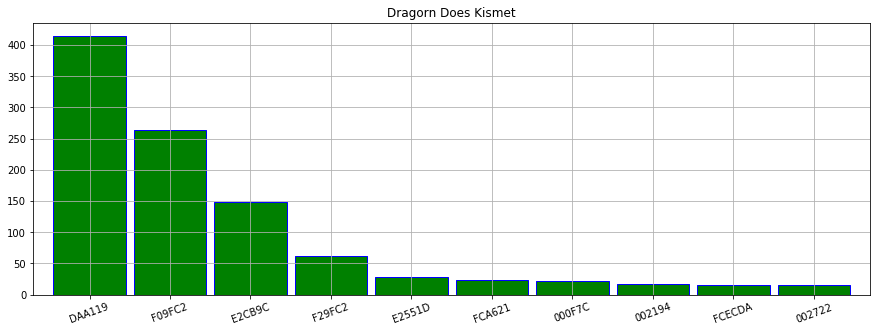

In [59]:
#here we take the same value_counts() method, get the top 10 of them, then plot a barplot (vertical)
guate.oui.value_counts()[0:10].plot.bar(figsize=(15,5),
                                        width=0.9,
                                        logy=False,
                                        facecolor='green',
                                        edgecolor='blue',
                                        title='Dragorn Does Kismet',
                                        rot=20,
                                        grid=True
                                       )

In [20]:
guate.head()

,first_time,last_time,devkey,phyname,devmac,strongest_signal,bytes_data,type,device,oui
0,2020-03-23 12:41:49,2020-03-23 12:41:49,4202770D00000000_8AC31B19A1DA0000,IEEE802.11,DA:A1:19:1B:C3:8A,-87,0,Wi-Fi Device,"b'{""kismet.device.base.manuf"": ""Unknown"",""kism...",DAA119
1,2020-03-23 12:42:41,2020-03-23 12:42:41,4202770D00000000_10A877DF80380000,IEEE802.11,38:80:DF:77:A8:10,-81,0,Wi-Fi Client,"b'{""kismet.device.base.manuf"": ""Motorola Mobil...",3880DF
2,2020-03-23 12:42:52,2020-03-23 12:42:52,4202770D00000000_668AB238E8DC0000,IEEE802.11,DC:E8:38:B2:8A:66,-85,0,Wi-Fi Client,"b'{""kismet.device.base.manuf"": ""CK Telecom (Sh...",DCE838
3,2020-03-23 12:43:01,2020-03-23 12:43:01,4202770D00000000_3D42DE1504EA0000,IEEE802.11,EA:04:15:DE:42:3D,-87,0,Wi-Fi Client,"b'{""kismet.device.base.manuf"": ""Unknown"",""kism...",EA0415
4,2020-03-23 12:43:11,2020-03-23 12:43:11,4202770D00000000_E3B1AA7471A40000,IEEE802.11,A4:71:74:AA:B1:E3,-88,0,Wi-Fi Device,"b'{""kismet.device.base.manuf"": ""Huawei Technol...",A47174


In [21]:
#using iloc to look at entry 0 (first entry) of the dataframe
#iloc is the standard way to look at the nth element in a dataframe
guate.iloc[0]

first_time                                        2020-03-23 12:41:49
last_time                                         2020-03-23 12:41:49
devkey                              4202770D00000000_8AC31B19A1DA0000
phyname                                                    IEEE802.11
devmac                                              DA:A1:19:1B:C3:8A
strongest_signal                                                  -87
bytes_data                                                          0
type                                                     Wi-Fi Device
device              b'{"kismet.device.base.manuf": "Unknown","kism...
oui                                                            DAA119
Name: 0, dtype: object

In [22]:
#and pulling just the device column, which is the json record of that device
#technically it's a bytes object, but that's basically a string with different encodings possible
guate.iloc[0].device

b'{"kismet.device.base.manuf": "Unknown","kismet.device.base.packets.rx": 0,"kismet.device.base.packets.total": 4,"kismet.device.base.mod_time": 1584967310,"kismet.device.base.last_time": 1584967309,"kismet.device.base.first_time": 1584967309,"kismet.device.base.basic_crypt_set": 0,"kismet.device.base.crypt": "","kismet.device.base.tags": {},"kismet.device.base.basic_type_set": 2,"kismet.device.base.num_alerts": 0,"kismet.device.base.type": "Wi-Fi Device","kismet.device.base.frequency": 2412000,"kismet.device.base.commonname": "DA:A1:19:1B:C3:8A","kismet.device.base.channel": "1","kismet.device.base.server_uuid": "00000000-0000-0000-0000-4B49534D4554","kismet.device.base.macaddr": "DA:A1:19:1B:C3:8A","kismet.device.base.key": "4202770D00000000_8AC31B19A1DA0000","kismet.device.base.related_devices": {},"kismet.device.base.phyname": "IEEE802.11","kismet.device.base.phyid": 0,"kismet.device.base.name": "","kismet.device.base.signal": {"kismet.common.signal.signal_rrd": {"kismet.common.rrd

In [23]:
#a simple function to return just the manufacturer from the json data
#this will be used to create a new column in our dataframe
def get_manu(device):
    devdata = json.loads(device)
    manu = devdata['kismet.device.base.manuf']
    return manu

In [24]:
#use the apply method to create the manuf column from the json data
guate['manuf'] = guate.device.apply(get_manu)

In [25]:
guate.head()

,first_time,last_time,devkey,phyname,devmac,strongest_signal,bytes_data,type,device,oui,manuf
0,2020-03-23 12:41:49,2020-03-23 12:41:49,4202770D00000000_8AC31B19A1DA0000,IEEE802.11,DA:A1:19:1B:C3:8A,-87,0,Wi-Fi Device,"b'{""kismet.device.base.manuf"": ""Unknown"",""kism...",DAA119,Unknown
1,2020-03-23 12:42:41,2020-03-23 12:42:41,4202770D00000000_10A877DF80380000,IEEE802.11,38:80:DF:77:A8:10,-81,0,Wi-Fi Client,"b'{""kismet.device.base.manuf"": ""Motorola Mobil...",3880DF,"Motorola Mobility LLC, a Lenovo Company"
2,2020-03-23 12:42:52,2020-03-23 12:42:52,4202770D00000000_668AB238E8DC0000,IEEE802.11,DC:E8:38:B2:8A:66,-85,0,Wi-Fi Client,"b'{""kismet.device.base.manuf"": ""CK Telecom (Sh...",DCE838,CK Telecom (Shenzhen) Limited
3,2020-03-23 12:43:01,2020-03-23 12:43:01,4202770D00000000_3D42DE1504EA0000,IEEE802.11,EA:04:15:DE:42:3D,-87,0,Wi-Fi Client,"b'{""kismet.device.base.manuf"": ""Unknown"",""kism...",EA0415,Unknown
4,2020-03-23 12:43:11,2020-03-23 12:43:11,4202770D00000000_E3B1AA7471A40000,IEEE802.11,A4:71:74:AA:B1:E3,-88,0,Wi-Fi Device,"b'{""kismet.device.base.manuf"": ""Huawei Technol...",A47174,Huawei Technologies Ltd


In [26]:
#take a look at which manufacturers are most prevalent
guate.manuf.value_counts()

Unknown                                    1592
Ubiquiti Networks Inc.                      352
Samsung Electronics Ltd                     247
Huawei Technologies Ltd                     186
Motorola Mobility LLC, a Lenovo Company      84
                                           ... 
Chongqing Fugui Electronics Ltd               1
Media Devices Ltd                             1
Repeatit AB                                   1
Shenzhen Bilian electronic Ltd                1
Guizhou Fortuneship Technology Ltd            1
Name: manuf, Length: 125, dtype: int64

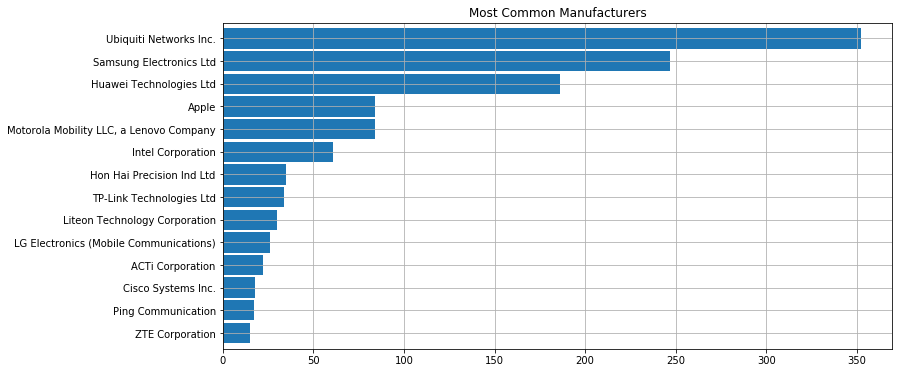

In [27]:
#and plot them in a horizontal bar plot, ignoring the 'Unknown' devices by starting at item 1, not 0
#I'm using sort_values to sort them in descending order. Leave it out to get them in ascending.
guate.manuf.value_counts()[1:15].sort_values().plot.barh(figsize=(12,6),
                                          width=0.9,
                                          grid=True,
                                          title='Most Common Manufacturers')

In [28]:
#same sort of thing as before, but this time get the commonname of the device
def get_name(device):
    devdata = json.loads(device)
    name = devdata['kismet.device.base.commonname']
    return name

In [29]:
#and apply that function to the device's json data to create a new column (devname)
guate['devname'] = guate.device.apply(get_name)

In [30]:
guate.head()

,first_time,last_time,devkey,phyname,devmac,strongest_signal,bytes_data,type,device,oui,manuf,devname
0,2020-03-23 12:41:49,2020-03-23 12:41:49,4202770D00000000_8AC31B19A1DA0000,IEEE802.11,DA:A1:19:1B:C3:8A,-87,0,Wi-Fi Device,"b'{""kismet.device.base.manuf"": ""Unknown"",""kism...",DAA119,Unknown,DA:A1:19:1B:C3:8A
1,2020-03-23 12:42:41,2020-03-23 12:42:41,4202770D00000000_10A877DF80380000,IEEE802.11,38:80:DF:77:A8:10,-81,0,Wi-Fi Client,"b'{""kismet.device.base.manuf"": ""Motorola Mobil...",3880DF,"Motorola Mobility LLC, a Lenovo Company",38:80:DF:77:A8:10
2,2020-03-23 12:42:52,2020-03-23 12:42:52,4202770D00000000_668AB238E8DC0000,IEEE802.11,DC:E8:38:B2:8A:66,-85,0,Wi-Fi Client,"b'{""kismet.device.base.manuf"": ""CK Telecom (Sh...",DCE838,CK Telecom (Shenzhen) Limited,DC:E8:38:B2:8A:66
3,2020-03-23 12:43:01,2020-03-23 12:43:01,4202770D00000000_3D42DE1504EA0000,IEEE802.11,EA:04:15:DE:42:3D,-87,0,Wi-Fi Client,"b'{""kismet.device.base.manuf"": ""Unknown"",""kism...",EA0415,Unknown,EA:04:15:DE:42:3D
4,2020-03-23 12:43:11,2020-03-23 12:43:11,4202770D00000000_E3B1AA7471A40000,IEEE802.11,A4:71:74:AA:B1:E3,-88,0,Wi-Fi Device,"b'{""kismet.device.base.manuf"": ""Huawei Technol...",A47174,Huawei Technologies Ltd,A4:71:74:AA:B1:E3


In [31]:
#then use value_counts to see what names are most prevalent
guate.devname.value_counts()

Westin                     64
LE-Bose QuietComfort 35    27
IHG Connect                 6
CDP                         2
CDP VPN                     2
                           ..
90:CD:B6:34:89:6F           1
F0:9F:C2:FD:A0:F1           1
BA:E9:95:5C:E2:03           1
6D:9C:1F:3E:33:B2           1
AE:45:1C:49:96:68           1
Name: devname, Length: 3086, dtype: int64

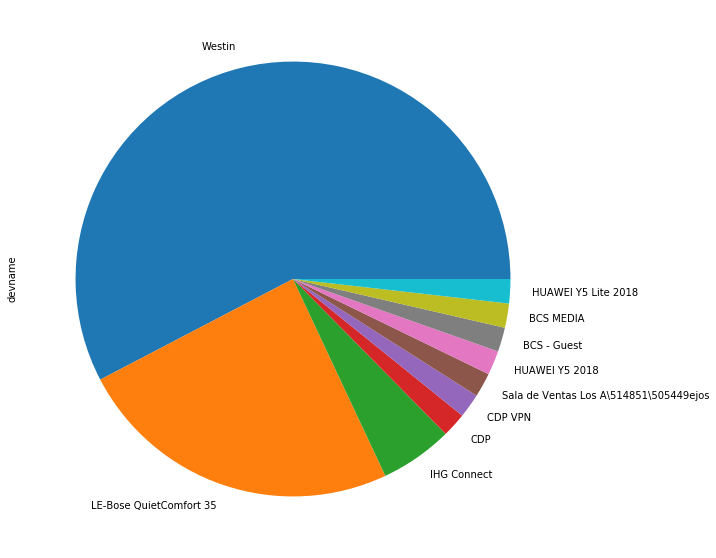

In [32]:
#and plot a pie plot of the first 10
guate.devname.value_counts()[0:10].plot.pie(figsize=(10,10))

In [33]:
#a lot of standard Python functions work
#here it's just the length of the dataframe (# of records)
len(guate)

3187

In [34]:
#min method to get the smallest value
guate.strongest_signal.min()

-93

In [35]:
#max method to get the largest
guate.strongest_signal.max()

14

In [36]:
#same thing, but with the timestamps
guate.first_time.min()

Timestamp('2020-03-23 12:41:48')

In [37]:
#get max timestamp
guate.last_time.max()

Timestamp('2020-03-25 12:21:19')

In [38]:
#connect to new database, pull data

conn2 = sqlite3.connect('tapachula_hotel.kismet')
tap_hotel = pd.read_sql_query(sql, conn2)
conn2.close()

In [39]:
tap_hotel.head()

,first_time,last_time,devkey,phyname,devmac,strongest_signal,min_lat,min_lon,max_lat,max_lon,avg_lat,avg_lon,bytes_data,type,device
0,1585240306,1585240306,4202770D00000000_7B4E083E201A0000,IEEE802.11,1A:20:3E:08:4E:7B,-87,0.0,0.0,0.0,0.0,0.0,0.0,0,Wi-Fi Client,"b'{""kismet.device.base.manuf"": ""Unknown"",""kism..."
1,1585240308,1585240308,4202770D00000000_2022A93C2F7E0000,IEEE802.11,7E:2F:3C:A9:22:20,-84,0.0,0.0,0.0,0.0,0.0,0.0,0,Wi-Fi Device,"b'{""kismet.device.base.manuf"": ""Unknown"",""kism..."
2,1585240325,1585240325,4202770D00000000_829F2E264FDA0000,IEEE802.11,DA:4F:26:2E:9F:82,-54,0.0,0.0,0.0,0.0,0.0,0.0,0,Wi-Fi Device,"b'{""kismet.device.base.manuf"": ""Unknown"",""kism..."
3,1585240327,1585240327,4202770D00000000_25512A19A1DA0000,IEEE802.11,DA:A1:19:2A:51:25,-84,0.0,0.0,0.0,0.0,0.0,0.0,0,Wi-Fi Device,"b'{""kismet.device.base.manuf"": ""Unknown"",""kism..."
4,1585240329,1585240329,4202770D00000000_1086B26FFF8E0000,IEEE802.11,8E:FF:6F:B2:86:10,-50,0.0,0.0,0.0,0.0,0.0,0.0,0,Wi-Fi Device,"b'{""kismet.device.base.manuf"": ""Unknown"",""kism..."


In [40]:
#standard Python set notation works too
#here we "convert" the devmac column to a set, called g1
g1 = set(guate.devmac)

In [41]:
#and the same for the tap_hotel's devmac column
g2 = set(tap_hotel.devmac)

In [42]:
#and use Python's set intersection to find the devices that show up in both
g1.intersection(g2)

{'00:00:CA:11:22:33',
 '00:03:7F:00:00:00',
 '02:00:00:00:00:00',
 '12:B7:F5:8A:0E:30',
 '88:9E:33:88:9B:88',
 'EC:5A:86:A8:7E:DC'}

In [43]:
#connect to 3rd db and pull data into dataframe with same sql query as before
conn3 = sqlite3.connect('tapachula_airport.kismet')
tap_ap = pd.read_sql_query(sql, conn3)

In [44]:
tap_ap.head()

,first_time,last_time,devkey,phyname,devmac,strongest_signal,min_lat,min_lon,max_lat,max_lon,avg_lat,avg_lon,bytes_data,type,device
0,1585316440,1585316440,4202770D00000000_8A377696A8B20000,IEEE802.11,B2:A8:96:76:37:8A,-43,0.0,0.0,0.0,0.0,0.0,0.0,0,Wi-Fi Client,"b'{""kismet.device.base.manuf"": ""Unknown"",""kism..."
1,1585316471,1585316471,4202770D00000000_88C2CB6AD4080000,IEEE802.11,08:D4:6A:CB:C2:88,-71,0.0,0.0,0.0,0.0,0.0,0.0,0,Wi-Fi Client,"b'{""kismet.device.base.manuf"": ""LG Electronics..."
2,1585316471,1585316471,4202770D00000000_97BE32C8C3060000,IEEE802.11,06:C3:C8:32:BE:97,-38,0.0,0.0,0.0,0.0,0.0,0.0,0,Wi-Fi Client,"b'{""kismet.device.base.manuf"": ""Unknown"",""kism..."
3,1585316433,1585316501,B603E01100000000_98349EDEBD500000,Bluetooth,50:BD:DE:9E:34:98,0,0.0,0.0,0.0,0.0,0.0,0.0,0,BTLE,"b'{""kismet.device.base.manuf"": ""Unknown"",""kism..."
4,1585316433,1585316490,B603E01100000000_77F600F028620000,Bluetooth,62:28:F0:00:F6:77,0,0.0,0.0,0.0,0.0,0.0,0.0,0,BTLE,"b'{""kismet.device.base.manuf"": ""Unknown"",""kism..."


In [45]:
#get device macs into a set
g3 = set(tap_ap.devmac)

In [46]:
#and get their intersection 
g1.intersection(g3)

{'02:00:00:00:00:00', 'EC:5A:86:A8:7E:DC'}

In [47]:
#let's see what was in the hotel and the airport
g2.intersection(g3)

{'00:25:00:FF:94:73',
 '02:00:00:00:00:00',
 '08:C5:E1:C3:4E:1D',
 '08:CC:27:97:35:6D',
 '0C:72:D9:28:27:8A',
 '14:C2:13:D9:5A:E7',
 '50:BC:96:51:34:3A',
 '78:3A:84:A0:5C:99',
 '7C:F3:1B:B0:AA:B7',
 '88:79:7E:0C:9E:86',
 '88:B4:A6:00:2F:2F',
 '8C:45:00:06:21:61',
 'BC:54:51:01:05:A6',
 'BC:A5:8B:39:A6:30',
 'C0:DC:DA:5B:83:5E',
 'DC:EF:CA:82:0A:03',
 'DC:EF:CA:D8:C8:01',
 'EC:5A:86:A8:7E:DC',
 'F8:38:80:71:FB:3C'}

In [48]:
#let's get their manufacturers by running the get_manu function we wrote earlier
tap_hotel['manuf'] = tap_hotel.device.apply(get_manu)
tap_ap['manuf'] = tap_ap.device.apply(get_manu)


In [49]:
#put the common devices in a list
common_devices = list(g2.intersection(g3))

In [50]:
common_devices

['88:79:7E:0C:9E:86',
 '00:25:00:FF:94:73',
 '0C:72:D9:28:27:8A',
 '08:CC:27:97:35:6D',
 'BC:54:51:01:05:A6',
 '08:C5:E1:C3:4E:1D',
 'DC:EF:CA:D8:C8:01',
 'DC:EF:CA:82:0A:03',
 'C0:DC:DA:5B:83:5E',
 '8C:45:00:06:21:61',
 '7C:F3:1B:B0:AA:B7',
 '88:B4:A6:00:2F:2F',
 '14:C2:13:D9:5A:E7',
 'BC:A5:8B:39:A6:30',
 '02:00:00:00:00:00',
 'EC:5A:86:A8:7E:DC',
 '50:BC:96:51:34:3A',
 '78:3A:84:A0:5C:99',
 'F8:38:80:71:FB:3C']

In [51]:
#create a new dataframe from the devices with devmacs that are in our list
#note the isin method and the structure of this 'filter'
#note, since they occur in both tap_ap and tap_hotel, you could use either dataframe to get this list
#but... one or the other might have additional data in the device's json field
interesting_devices = tap_ap[tap_ap.devmac.isin(common_devices)]

In [52]:
#These appear to mostly be mobile devices except 00:25:00:FF:94:73, which is Apple P2p Airplay (adhoc)
#yeah, yeah, still mobile, but not specific to one device
#also 02:00:00:00:00:00, which is an Android mac when you don't have permissions to get the mac
interesting_devices

,first_time,last_time,devkey,phyname,devmac,strongest_signal,min_lat,min_lon,max_lat,max_lon,avg_lat,avg_lon,bytes_data,type,device,manuf
93,1585316467,1585316862,4202770D00000000_995CA0843A780000,IEEE802.11,78:3A:84:A0:5C:99,-65,0.0,0.0,0.0,0.0,0.0,0.0,36,Wi-Fi Client,"b'{""kismet.device.base.manuf"": ""Apple"",""kismet...",Apple
125,1585316609,1585316929,4202770D00000000_DC7EA8865AEC0000,IEEE802.11,EC:5A:86:A8:7E:DC,-39,0.0,0.0,0.0,0.0,0.0,0.0,0,Wi-Fi Client,"b'{""kismet.device.base.manuf"": ""Yulong Compute...",Yulong Computer Telecommunication Scientific (...
170,1585316548,1585317172,4202770D00000000_20000,IEEE802.11,02:00:00:00:00:00,-47,0.0,0.0,0.0,0.0,0.0,0.0,0,Wi-Fi Client,"b'{""kismet.device.base.manuf"": ""Unknown"",""kism...",Unknown
317,1585316810,1585317661,4202770D00000000_E75AD913C2140000,IEEE802.11,14:C2:13:D9:5A:E7,-37,0.0,0.0,0.0,0.0,0.0,0.0,753252,Wi-Fi Client,"b'{""kismet.device.base.manuf"": ""Apple"",""kismet...",Apple
339,1585317579,1585317777,4202770D00000000_3CFB718038F80000,IEEE802.11,F8:38:80:71:FB:3C,-43,0.0,0.0,0.0,0.0,0.0,0.0,97649,Wi-Fi Client,"b'{""kismet.device.base.manuf"": ""Apple"",""kismet...",Apple
378,1585317959,1585317959,4202770D00000000_8A2728D9720C0000,IEEE802.11,0C:72:D9:28:27:8A,-53,0.0,0.0,0.0,0.0,0.0,0.0,0,Wi-Fi Client,"b'{""kismet.device.base.manuf"": ""ZTE Corporatio...",ZTE Corporation
463,1585317444,1585318321,4202770D00000000_5E835BDADCC00000,IEEE802.11,C0:DC:DA:5B:83:5E,-60,0.0,0.0,0.0,0.0,0.0,0.0,0,Wi-Fi Client,"b'{""kismet.device.base.manuf"": ""Unknown"",""kism...",Unknown
478,1585318361,1585318361,4202770D00000000_7394FF0025000000,IEEE802.11,00:25:00:FF:94:73,-62,0.0,0.0,0.0,0.0,0.0,0.0,138,Wi-Fi Ad-Hoc,"b'{""kismet.device.base.manuf"": ""Apple"",""kismet...",Apple
522,1585316535,1585318537,4202770D00000000_869E0C7E79880000,IEEE802.11,88:79:7E:0C:9E:86,-34,0.0,0.0,0.0,0.0,0.0,0.0,29300,Wi-Fi Client,"b'{""kismet.device.base.manuf"": ""Motorola Mobil...","Motorola Mobility LLC, a Lenovo Company"
609,1585317217,1585318852,4202770D00000000_6D359727CC080000,IEEE802.11,08:CC:27:97:35:6D,-35,0.0,0.0,0.0,0.0,0.0,0.0,0,Wi-Fi Client,"b'{""kismet.device.base.manuf"": ""Unknown"",""kism...",Unknown


In [53]:
#lastly, one thing I didn't do on the live stream is a basic filter
#the mask actually creates a truth table of True/False for the entire Series of values
#then the guate[mask] applies it to the dataframe
mask = guate.type=='Wi-Fi Client'
guate[mask]

,first_time,last_time,devkey,phyname,devmac,strongest_signal,bytes_data,type,device,oui,manuf,devname
1,2020-03-23 12:42:41,2020-03-23 12:42:41,4202770D00000000_10A877DF80380000,IEEE802.11,38:80:DF:77:A8:10,-81,0,Wi-Fi Client,"b'{""kismet.device.base.manuf"": ""Motorola Mobil...",3880DF,"Motorola Mobility LLC, a Lenovo Company",38:80:DF:77:A8:10
2,2020-03-23 12:42:52,2020-03-23 12:42:52,4202770D00000000_668AB238E8DC0000,IEEE802.11,DC:E8:38:B2:8A:66,-85,0,Wi-Fi Client,"b'{""kismet.device.base.manuf"": ""CK Telecom (Sh...",DCE838,CK Telecom (Shenzhen) Limited,DC:E8:38:B2:8A:66
3,2020-03-23 12:43:01,2020-03-23 12:43:01,4202770D00000000_3D42DE1504EA0000,IEEE802.11,EA:04:15:DE:42:3D,-87,0,Wi-Fi Client,"b'{""kismet.device.base.manuf"": ""Unknown"",""kism...",EA0415,Unknown,EA:04:15:DE:42:3D
7,2020-03-23 12:43:33,2020-03-23 12:43:54,4202770D00000000_A6D3B98CEF3C0000,IEEE802.11,3C:EF:8C:B9:D3:A6,-88,140,Wi-Fi Client,"b'{""kismet.device.base.manuf"": ""Zhejiang Dahua...",3CEF8C,Zhejiang Dahua Technology Ltd,3C:EF:8C:B9:D3:A6
8,2020-03-23 12:44:15,2020-03-23 12:44:15,4202770D00000000_571800AA3E500000,IEEE802.11,50:3E:AA:00:18:57,-83,0,Wi-Fi Client,"b'{""kismet.device.base.manuf"": ""TP-Link Techno...",503EAA,TP-Link Technologies Ltd,50:3E:AA:00:18:57
...,...,...,...,...,...,...,...,...,...,...,...,...
3164,2020-03-23 12:43:26,2020-03-25 12:20:46,4202770D00000000_AE017BAEA17C0000,IEEE802.11,7C:A1:AE:7B:01:AE,-22,1234039,Wi-Fi Client,"b'{""kismet.device.base.manuf"": ""Unknown"",""kism...",7CA1AE,Unknown,7C:A1:AE:7B:01:AE
3165,2020-03-23 12:48:25,2020-03-25 12:20:56,4202770D00000000_4DFF9E10F78C0000,IEEE802.11,8C:F7:10:9E:FF:4D,-70,0,Wi-Fi Client,"b'{""kismet.device.base.manuf"": ""AMPAK Technolo...",8CF710,AMPAK Technology Inc.,8C:F7:10:9E:FF:4D
3174,2020-03-25 12:16:25,2020-03-25 12:20:46,4202770D00000000_A6773E8CCE700000,IEEE802.11,70:CE:8C:3E:77:A6,-34,974,Wi-Fi Client,"b'{""kismet.device.base.manuf"": ""Unknown"",""kism...",70CE8C,Unknown,70:CE:8C:3E:77:A6
3184,2020-03-23 12:59:26,2020-03-25 12:21:18,4202770D00000000_6DE5A79C2AFC0000,IEEE802.11,FC:2A:9C:A7:E5:6D,-21,185416,Wi-Fi Client,"b'{""kismet.device.base.manuf"": ""Apple"",""kismet...",FC2A9C,Apple,FC:2A:9C:A7:E5:6D


In [54]:
#you can also use some string methods with these, like .contains, .startswith, .endswith, etc.
mask2 = (guate.type.str.contains('Wi-Fi'))
guate[mask2]

,first_time,last_time,devkey,phyname,devmac,strongest_signal,bytes_data,type,device,oui,manuf,devname
0,2020-03-23 12:41:49,2020-03-23 12:41:49,4202770D00000000_8AC31B19A1DA0000,IEEE802.11,DA:A1:19:1B:C3:8A,-87,0,Wi-Fi Device,"b'{""kismet.device.base.manuf"": ""Unknown"",""kism...",DAA119,Unknown,DA:A1:19:1B:C3:8A
1,2020-03-23 12:42:41,2020-03-23 12:42:41,4202770D00000000_10A877DF80380000,IEEE802.11,38:80:DF:77:A8:10,-81,0,Wi-Fi Client,"b'{""kismet.device.base.manuf"": ""Motorola Mobil...",3880DF,"Motorola Mobility LLC, a Lenovo Company",38:80:DF:77:A8:10
2,2020-03-23 12:42:52,2020-03-23 12:42:52,4202770D00000000_668AB238E8DC0000,IEEE802.11,DC:E8:38:B2:8A:66,-85,0,Wi-Fi Client,"b'{""kismet.device.base.manuf"": ""CK Telecom (Sh...",DCE838,CK Telecom (Shenzhen) Limited,DC:E8:38:B2:8A:66
3,2020-03-23 12:43:01,2020-03-23 12:43:01,4202770D00000000_3D42DE1504EA0000,IEEE802.11,EA:04:15:DE:42:3D,-87,0,Wi-Fi Client,"b'{""kismet.device.base.manuf"": ""Unknown"",""kism...",EA0415,Unknown,EA:04:15:DE:42:3D
4,2020-03-23 12:43:11,2020-03-23 12:43:11,4202770D00000000_E3B1AA7471A40000,IEEE802.11,A4:71:74:AA:B1:E3,-88,0,Wi-Fi Device,"b'{""kismet.device.base.manuf"": ""Huawei Technol...",A47174,Huawei Technologies Ltd,A4:71:74:AA:B1:E3
...,...,...,...,...,...,...,...,...,...,...,...,...
3180,2020-03-23 12:41:50,2020-03-25 12:21:18,4202770D00000000_8D10F4C29FF00000,IEEE802.11,F0:9F:C2:F4:10:8D,-34,17225648,Wi-Fi AP,"b'{""kismet.device.base.manuf"": ""Ubiquiti Netwo...",F09FC2,Ubiquiti Networks Inc.,Westin
3181,2020-03-23 12:41:50,2020-03-25 12:21:18,4202770D00000000_30F8F7C29FF00000,IEEE802.11,F0:9F:C2:F7:F8:30,12,3722734,Wi-Fi AP,"b'{""kismet.device.base.manuf"": ""Ubiquiti Netwo...",F09FC2,Ubiquiti Networks Inc.,Westin
3183,2020-03-23 12:48:12,2020-03-25 12:21:14,4202770D00000000_F91FD4A620000000,IEEE802.11,00:20:A6:D4:1F:F9,-79,175324,Wi-Fi Ad-Hoc,"b'{""kismet.device.base.manuf"": ""Proxim Wireles...",0020A6,Proxim Wireless,00:20:A6:D4:1F:F9
3184,2020-03-23 12:59:26,2020-03-25 12:21:18,4202770D00000000_6DE5A79C2AFC0000,IEEE802.11,FC:2A:9C:A7:E5:6D,-21,185416,Wi-Fi Client,"b'{""kismet.device.base.manuf"": ""Apple"",""kismet...",FC2A9C,Apple,FC:2A:9C:A7:E5:6D
